In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Random Forest Machine Learning Model

In [ ]:
# Load your dataset into a pandas DataFrame (assuming you have a 'data' DataFrame)

# ------------------------------- ATTEMPT 1 -------------------------------
df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset.csv'
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date).csv'
# -------------------------------------------------------------------------

# ------------------------------- ATTEMPT 2 -------------------------------
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended.csv'
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended (Date).csv'
# -------------------------------------------------------------------------

df = pd.read_csv(df_file_path)

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Date Variable Testing

## ---------------------------------------------------------------------- Epoch ----------------------------------------------------------------------
# df_epoch_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date) - epoch.csv'
# df_epoch = pd.read_csv(df_epoch_file_path)
# df_epoch.head()

# df = df_epoch
## ----------------------------------------------------------------------------------------------------------------------------------------------------

## ------------------------------------------------------------- Epoch, Year, Month & Day -------------------------------------------------------------
# df_epoch_and_year_month_day_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date) - epoch, year, month, day.csv'
# df_epoch_and_year_month_day = pd.read_csv(df_epoch_and_year_month_day_file_path)
# df_epoch_and_year_month_day.head()

# df = df_epoch_and_year_month_day

## ----------------------------------------------------------------------------------------------------------------------------------------------------

# NOTE: if you want to normalise these datasets, use the 'Without Date' option below as the date variable has been removed from these datasets

In [ ]:
# Normalize columns (except LE)
scaler = MinMaxScaler()

# ----------- Without Date -----------
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
# ------------------------------------

# ------------- With Date ------------
# df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
# ------------------------------------

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Split the dataset into train, validation, and test sets (using the same splits)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
# Calculate the mean of the 'Daily LE' column
mean_daily_le = train_data['Daily LE'].mean()

In [ ]:
# Prepare the data for training
X_train = train_data.iloc[:, 1:]
y_train = train_data['Daily LE']

X_val = val_data.iloc[:, 1:]
y_val = val_data['Daily LE']

X_test = test_data.iloc[:, 1:]
y_test = test_data['Daily LE']

In [ ]:
# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test R-squared: {test_r2}")

# Calculate normalized performance metrics
normalized_test_mse = test_mse / mean_daily_le
normalized_test_mae = test_mae / mean_daily_le

print(f"Normalized Test Mean Squared Error: {normalized_test_mse * 100}%")
print(f"Normalized Test Mean Absolute Error: {normalized_test_mae * 100}%")

Test Mean Squared Error: 1127794.2726386497
Test Mean Absolute Error: 763.5368214049998
Test R-squared: 0.7195121711933017
Normalized Test Mean Squared Error: 49918.430859121225%
Normalized Test Mean Absolute Error: 33.79566730599167%


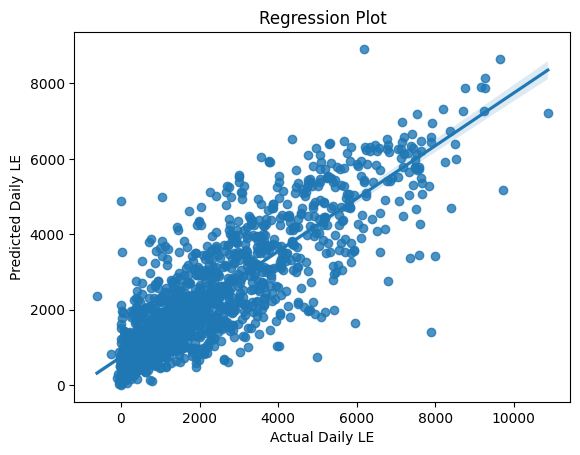

In [ ]:
# Plot a regression plot
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Daily LE')
plt.ylabel('Predicted Daily LE')
plt.title('Regression Plot')
plt.show()